<a href="https://colab.research.google.com/github/maorueda89/maorueda89/blob/main/zona_valoracion_empresas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from matplotlib import pyplot as plt

In [2]:
simbolo=input(str(''))

acls


In [3]:
accion=yf.Ticker(simbolo)
print(accion)
print(accion.info.get('shortName'))

yfinance.Ticker object <ACLS>
Axcelis Technologies, Inc.


REVENUES

In [4]:
revenue=accion.financials
revenue=pd.DataFrame(revenue)
revenue=revenue.loc[['Total Revenue']]/1000000
revenue=revenue[revenue.columns[0:4]]
revenue[revenue.columns[::-1]]


,2020-12-31,2021-12-31,2022-12-31,2023-12-31
Total Revenue,474.56,662.428,919.998,1130.604


In [5]:
qrevenue=accion.quarterly_financials
qrevenue=pd.DataFrame(qrevenue)
qrevenue=qrevenue.loc[['Total Revenue']]/1000000
qrevenue=qrevenue[qrevenue.columns[0:5]]
qrevenue[qrevenue.columns[::-1]]


,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
Total Revenue,292.326,310.288,252.372,256.512,256.564


In [6]:
accion.financials

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.116066,0.106,0.181,0.105644
Normalized EBITDA,297015000.0,222068000.0,136081000.0,71036000.0
Net Income From Continuing Operation Net Minority Interest,246263000.0,183079000.0,98650000.0,49982000.0
Reconciled Depreciation,13069000.0,11607000.0,10818000.0,9939000.0
Reconciled Cost Of Revenue,639303000.0,518208000.0,375983000.0,275976000.0
EBITDA,297015000.0,222068000.0,136081000.0,71036000.0
EBIT,283946000.0,210461000.0,125263000.0,61097000.0
Net Interest Income,12852000.0,-1025000.0,-4626000.0,-4473000.0
Interest Expense,5347000.0,5576000.0,4835000.0,5211000.0


EBITDA

In [7]:
ebitda=accion.financials
ebitda=pd.DataFrame(ebitda)
ebitda=ebitda.loc[['EBITDA']]/1000000
ebitda=ebitda[ebitda.columns[0:4]]
ebitda[ebitda.columns[::-1]]


,2020-12-31,2021-12-31,2022-12-31,2023-12-31
EBITDA,71.036,136.081,222.068,297.015


In [8]:
qebitda=accion.quarterly_financials

qebitda=pd.DataFrame(qebitda)
qebitda=qebitda.loc[['EBITDA']]/1000000
qebitda=qebitda[qebitda.columns[0:5]]
qebitda[qebitda.columns[::-1]]

,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
EBITDA,78.23,92.307,64.12,62.465,60.604


1) MARGEN EBITDA en porcentaje

In [9]:
margen_ebitda=(ebitda.values/revenue.values)*100
margen_ebitda=pd.DataFrame(margen_ebitda,columns=ebitda.columns)
margen_ebitda[margen_ebitda.columns[::-1]]

,2020-12-31,2021-12-31,2022-12-31,2023-12-31
0,14.968813,20.542761,24.137879,26.270471


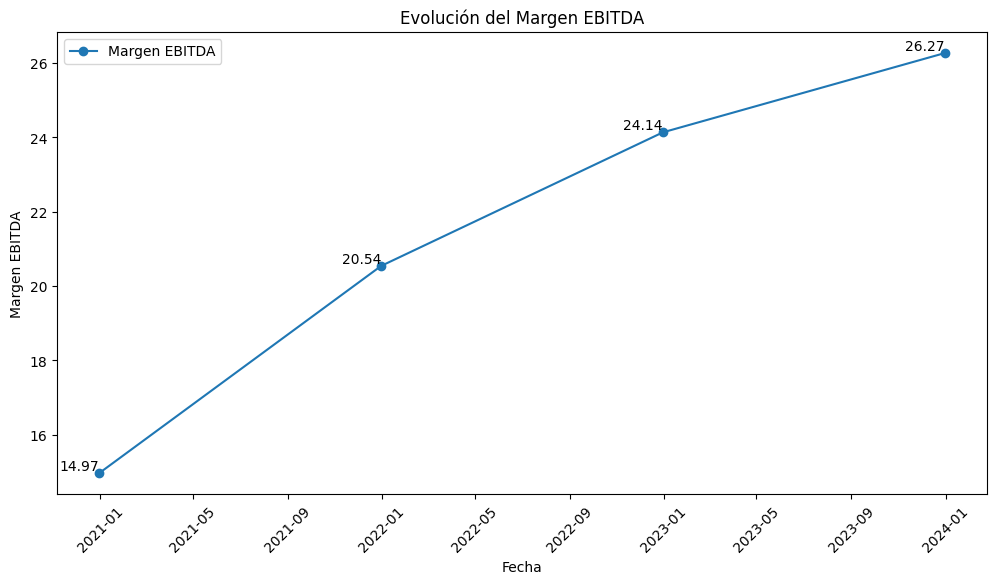

In [10]:
# Transponer los datos si es necesario
margen_ebitdaT = margen_ebitda.transpose()

# Ajustar el tamaño de la figura antes de plotear
plt.figure(figsize=(12,6))

# Graficar la línea con marcadores
plt.plot(margen_ebitdaT.index, margen_ebitdaT.values.flatten(), marker='o', linestyle='-', label='Margen EBITDA')

# Agregar los puntos con etiquetas
for i, txt in enumerate(margen_ebitdaT.values.flatten()):
    plt.text(margen_ebitdaT.index[i], txt, f"{txt:.2f}", ha='right', va='bottom', fontsize=10, color='black')

# Rotar los labels del eje X para que se vean mejor
plt.xticks(rotation=45)

# Agregar título y etiquetas a los ejes
plt.title("Evolución del Margen EBITDA")
plt.xlabel("Fecha")
plt.ylabel("Margen EBITDA")

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()



In [11]:
qmargen_ebitda=(qebitda.values/qrevenue.values)*100
qmargen_ebitda=pd.DataFrame(qmargen_ebitda,columns=qebitda.columns)
qmargen_ebitda[qmargen_ebitda.columns[::-1]]

,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
0,26.761219,29.748814,25.406939,24.351687,23.621397


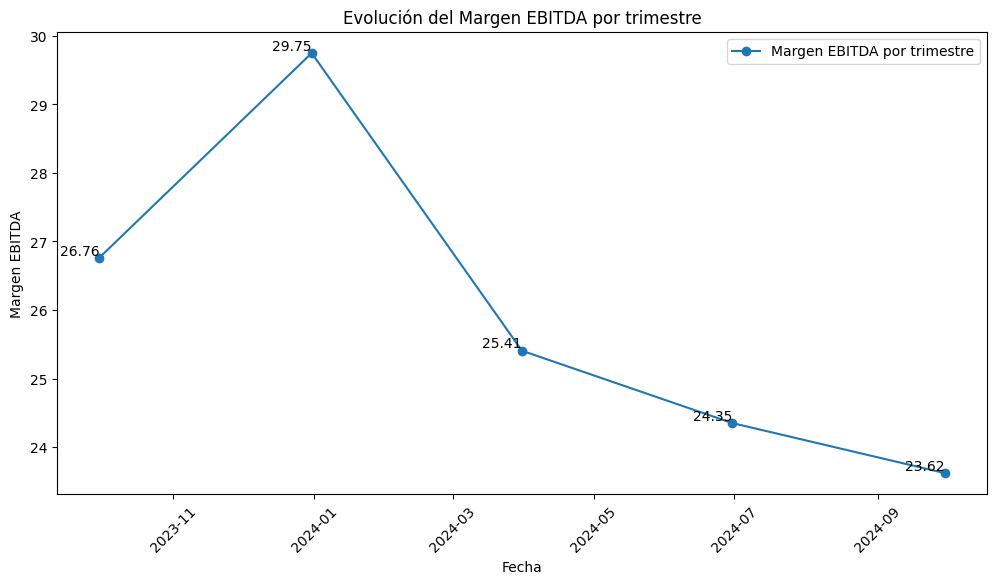

  2024-09-30 2024-06-30 2024-03-31 2023-12-31 2023-09-30
0  23.621397  24.351687  25.406939  29.748814  26.761219


In [12]:
# Transponer los datos si es necesario
qmargen_ebitdaT = qmargen_ebitda.transpose()

# Ajustar el tamaño de la figura antes de plotear
plt.figure(figsize=(12,6))

# Graficar la línea con marcadores
plt.plot(qmargen_ebitdaT.index, qmargen_ebitdaT.values.flatten(), marker='o', linestyle='-', label='Margen EBITDA por trimestre')

# Agregar los puntos con etiquetas
for i, txt in enumerate(qmargen_ebitdaT.values.flatten()):
    plt.text(qmargen_ebitdaT.index[i], txt, f"{txt:.2f}", ha='right', va='bottom', fontsize=10, color='black')

# Rotar los labels del eje X para que se vean mejor
plt.xticks(rotation=45)

# Agregar título y etiquetas a los ejes
plt.title("Evolución del Margen EBITDA por trimestre")
plt.xlabel("Fecha")
plt.ylabel("Margen EBITDA")

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

print(qmargen_ebitda)


RECEIVABLES

In [13]:
try:
  receivables=accion.balance_sheet
  receivables=pd.DataFrame(receivables)
  receivables=receivables.loc[['Receivables']]/1000000
  receivables=receivables[receivables.columns[0:4]]
  print(receivables[receivables.columns[::-1]])
except:
  receivables=[0,0,0,0]
  receivables=pd.DataFrame(receivables)
  receivables=receivables.transpose()
  print(receivables)



            2020-12-31 2021-12-31 2022-12-31 2023-12-31
Receivables     86.865     104.41    169.773    217.964


In [14]:
try:
  qreceivables=accion.quarterly_balance_sheet
  qreceivables=pd.DataFrame(qreceivables)
  qreceivables=qreceivables.loc[['Receivables']]/1000000
  qreceivables=qreceivables[qreceivables.columns[0:5]]
  print(qreceivables[qreceivables.columns[::-1]])
except:
  qreceivables=[0,0,0,0,0]
  qreceivables=pd.DataFrame(qreceivables)
  qreceivables=qreceivables.transpose()
  print(qreceivables)


            2023-09-30 2023-12-31 2024-03-31 2024-06-30 2024-09-30
Receivables    192.327    217.964    208.544     188.08    183.543


TOTAL INVENTORIES

In [15]:
try:
  inventories=accion.balance_sheet
  inventories=pd.DataFrame(inventories)
  inventories=inventories.loc[['Inventory']]/1000000
  inventories=inventories[inventories.columns[0:4]]
  print(inventories[inventories.columns[::-1]])
except:
  inventories=[0,0,0,0]
  inventories=pd.DataFrame(inventories)
  inventories=inventories.transpose()
  print(inventories)



          2020-12-31 2021-12-31 2022-12-31 2023-12-31
Inventory    161.076    194.984    242.406    306.482


In [16]:
try:
  qinventories=accion.quarterly_balance_sheet
  qinventories=pd.DataFrame(qinventories)
  qinventories=qinventories.loc[['Inventory']]/1000000
  qinventories=qinventories[qinventories.columns[0:5]]
  print(qinventories[qinventories.columns[::-1]])
except:
  qinventories=[0,0,0,0,0]
  qinventories=pd.DataFrame(qinventories)
  qinventories=qinventories.transpose()
  print(qinventories)

          2023-09-30 2023-12-31 2024-03-31 2024-06-30 2024-09-30
Inventory    312.223    306.482     312.17     283.09    290.954


Accounts Payable & Accrued Expense

In [17]:
try:
  payables_acrued=accion.balance_sheet
  payables_acrued=pd.DataFrame(payables_acrued)
  payables_acrued=payables_acrued.loc[['Payables And Accrued Expenses']]/1000000
  payables_acrued=payables_acrued[payables_acrued.columns[0:4]]
  print(payables_acrued[payables_acrued.columns[::-1]])
except:
  payables_acrued=[0,0,0,0]
  payables_acrued=pd.DataFrame(payables_acrued)
  payables_acrued=payables_acrued.transpose()
  print(payables_acrued)


                              2020-12-31 2021-12-31 2022-12-31 2023-12-31
Payables And Accrued Expenses     24.667     38.912      66.65     60.564


In [18]:
try:
  qpayables_acrued=accion.quarterly_balance_sheet
  qpayables_acrued=pd.DataFrame(qpayables_acrued)
  qpayables_acrued=qpayables_acrued.loc[['Payables And Accrued Expenses']]/1000000
  qpayables_acrued=qpayables_acrued[qpayables_acrued.columns[0:5]]
  print(qpayables_acrued[qpayables_acrued.columns[::-1]])
except:
  qpayables_acrued=[0,0,0,0,0]
  qpayables_acrued=pd.DataFrame(qpayables_acrued)
  qpayables_acrued=qpayables_acrued.transpose()
  print(qpayables_acrued)

                              2023-09-30 2023-12-31 2024-03-31 2024-06-30  \
Payables And Accrued Expenses     60.643     60.564     66.703     45.782   

                              2024-09-30  
Payables And Accrued Expenses     54.047  


CAPITAL DE TRABAJO ANUAL Y TRIMESTRAL

In [19]:
capital_trabajo=(receivables.values+inventories.values-payables_acrued.values)
capital_trabajo=pd.DataFrame(capital_trabajo,columns=ebitda.columns)
print(capital_trabajo[capital_trabajo.columns[::-1]])

  2020-12-31 2021-12-31 2022-12-31 2023-12-31
0    223.274    260.482    345.529    463.882


In [20]:
qcapital_trabajo=(qreceivables.values+qinventories.values-qpayables_acrued.values)
qcapital_trabajo=pd.DataFrame(qcapital_trabajo,columns=qebitda.columns)
print(qcapital_trabajo[qcapital_trabajo.columns[::-1]])

  2023-09-30 2023-12-31 2024-03-31 2024-06-30 2024-09-30
0    443.907    463.882    454.011    425.388     420.45


2) PKT ktno/ventas en %

In [21]:
pkt=(capital_trabajo.values/revenue.values)*100
pkt=pd.DataFrame(pkt,columns=ebitda.columns)
pkt[pkt.columns[::-1]]

,2020-12-31,2021-12-31,2022-12-31,2023-12-31
0,47.048635,39.322311,37.557582,41.029574


In [22]:
qpkt=(qcapital_trabajo.values/(qrevenue.values*4))*100
qpkt=pd.DataFrame(qpkt,columns=qebitda.columns)
qpkt[qpkt.columns[::-1]]

,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
0,37.963353,37.375116,44.974383,41.458879,40.96931


PROPERTY PLAN AND EQUIPMENT

In [23]:
accion.balancesheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Ordinary Shares Number,32685000.0,32775000.0,33240000.0,33633000.0
Share Issued,32685000.0,32775000.0,33240000.0,33633000.0
Total Debt,45185000.0,46414000.0,47394000.0,48149000.0
Tangible Book Value,864882000.0,667256000.0,538959000.0,481602000.0
Invested Capital,864882000.0,667256000.0,538959000.0,481602000.0
...,...,...,...,...
Allowance For Doubtful Accounts Receivable,-460000.0,0.0,0.0,0.0
Gross Accounts Receivable,218424000.0,169773000.0,104410000.0,86865000.0
Cash Cash Equivalents And Short Term Investments,506148000.0,432166000.0,294923000.0,203479000.0
Other Short Term Investments,338851000.0,246571000.0,0.0,NaN


In [24]:
property_plant_equipment=accion.balance_sheet
property_plant_equipment=pd.DataFrame(property_plant_equipment)
property_plant_equipment=property_plant_equipment.loc[['Net PPE']]/1000000
property_plant_equipment=property_plant_equipment[property_plant_equipment.columns[0:4]]
property_plant_equipment[property_plant_equipment.columns[::-1]]



,2020-12-31,2021-12-31,2022-12-31,2023-12-31
Net PPE,54.926,63.452,69.752,101.319


In [25]:
qproperty_plant_equipment=accion.quarterly_balance_sheet
qproperty_plant_equipment=pd.DataFrame(qproperty_plant_equipment)
qproperty_plant_equipment=qproperty_plant_equipment.loc[['Net PPE']]/1000000
qproperty_plant_equipment=qproperty_plant_equipment[qproperty_plant_equipment.columns[0:5]]
qproperty_plant_equipment[qproperty_plant_equipment.columns[::-1]]

,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
Net PPE,95.232,101.319,98.899,97.324,100.513


INTANGIBLE ASSETS

In [26]:
try:
  intangibleassets=accion.balance_sheet
  intangibleassets=pd.DataFrame(intangibleassets)
  intangibleassets=intangibleassets.loc[['Goodwill And Other Intangible Assets']]/1000000
  intangibleassets=intangibleassets[intangibleassets.columns[0:4]]
  intangibleassets[intangibleassets.columns[::-1]]
except:
  intangibleassets=[0,0,0,0]
  intangibleassets=pd.DataFrame(intangibleassets)
  intangibleassets=intangibleassets.transpose()


intangibleassets

,0,1,2,3
0,0,0,0,0


In [27]:
try:
  qintangibleassets=accion.quarterly_balance_sheet
  qintangibleassets=pd.DataFrame(qintangibleassets)
  qintangibleassets=qintangibleassets.loc[['Goodwill And Other Intangible Assets']]/1000000
  qintangibleassets=qintangibleassets[qintangibleassets.columns[0:5]]
  qintangibleassets[qintangibleassets.columns[::-1]]
except:
  qintangibleassets=[0,0,0,0,0]
  qintangibleassets=pd.DataFrame(qintangibleassets)
  qintangibleassets=qintangibleassets.transpose()


qintangibleassets

,0,1,2,3,4
0,0,0,0,0,0


GOODWILL

In [28]:
try:
  goodwill=accion.balance_sheet
  goodwill=pd.DataFrame(goodwill)
  goodwill=goodwill.loc[['Goodwill']]/1000000
  goodwill=goodwill[goodwill.columns[0:4]]
  goodwill[goodwill.columns[::-1]]

except:
  goodwill=[0,0,0,0]
  goodwill=pd.DataFrame(goodwill)
  goodwill=goodwill.transpose()

goodwill



,0,1,2,3
0,0,0,0,0


In [29]:
try:
  qgoodwill=accion.quarterly_balance_sheet
  qgoodwill=pd.DataFrame(qgoodwill)
  qgoodwill=qgoodwill.loc[['Goodwill']]/1000000
  qgoodwill=qgoodwill[qgoodwill.columns[0:5]]
  qgoodwill[qgoodwill.columns[::-1]]
except:
  qgoodwill=[0,0,0,0,0]
  qgoodwill=pd.DataFrame(qgoodwill)
  qgoodwill=qgoodwill.transpose()

qgoodwill




,0,1,2,3,4
0,0,0,0,0,0


ACTIVOS NO CORRIENTES

In [30]:
activos_no_corrientes=property_plant_equipment.values+intangibleassets.values+goodwill.values
activos_no_corrientes=pd.DataFrame(activos_no_corrientes,columns=ebitda.columns)
activos_no_corrientes[activos_no_corrientes.columns[::-1]]


,2020-12-31,2021-12-31,2022-12-31,2023-12-31
0,54.926,63.452,69.752,101.319


In [31]:
qactivos_no_corrientes=qproperty_plant_equipment.values+qintangibleassets.values+qgoodwill.values
qactivos_no_corrientes=pd.DataFrame(qactivos_no_corrientes,columns=qebitda.columns)
qactivos_no_corrientes[qactivos_no_corrientes.columns[::-1]]


,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
0,95.232,101.319,98.899,97.324,100.513


**3 ) PRODUCTIVIDAD DE LA CAPACIDAD INSTALADA en %**

In [32]:
product_capacidad_instalada=(activos_no_corrientes.values/revenue.values)*100
product_capacidad_instalada=pd.DataFrame(product_capacidad_instalada,columns=ebitda.columns)
product_capacidad_instalada[product_capacidad_instalada.columns[::-1]]


,2020-12-31,2021-12-31,2022-12-31,2023-12-31
0,11.57409,9.578701,7.581756,8.961493


In [33]:
qproduct_capacidad_instalada=(qactivos_no_corrientes.values/(qrevenue.values*4))*100
qproduct_capacidad_instalada=pd.DataFrame(qproduct_capacidad_instalada,columns=qebitda.columns)
qproduct_capacidad_instalada[qproduct_capacidad_instalada.columns[::-1]]

,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
0,8.144332,8.163303,9.796947,9.485326,9.794145


Gastos por intereses

In [34]:
interes_expense=accion.financials
interes_expense=pd.DataFrame(interes_expense)
interes_expense=(interes_expense.loc[['Interest Expense']]*-1)/1000000
interes_expense=interes_expense[interes_expense.columns[0:4]]
interes_expense[interes_expense.columns[::-1]]


,2020-12-31,2021-12-31,2022-12-31,2023-12-31
Interest Expense,-5.211,-4.835,-5.576,-5.347


In [35]:
qinteres_expense=accion.quarterly_financials
qinteres_expense=pd.DataFrame(qinteres_expense)
qinteres_expense=(qinteres_expense.loc[['Interest Expense']]*-1)/1000000
qinteres_expense=qinteres_expense[qinteres_expense.columns[0:5]]
qinteres_expense[qinteres_expense.columns[::-1]]


,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
Interest Expense,-1.325,-1.32,-1.346,-1.339,-1.333


Tax Provision

In [36]:
tax_provision=accion.financials
tax_provision=pd.DataFrame(tax_provision)
tax_provision=(tax_provision.loc[['Tax Provision']]*-1)/1000000
tax_provision=tax_provision[tax_provision.columns[0:4]]
tax_provision[tax_provision.columns[::-1]]


,2020-12-31,2021-12-31,2022-12-31,2023-12-31
Tax Provision,-5.904,-21.778,-21.806,-32.336


In [37]:
qtax_provision=accion.quarterly_financials
qtax_provision=pd.DataFrame(qtax_provision)
qtax_provision=(qtax_provision.loc[['Tax Provision']]*-1)/1000000
qtax_provision=qtax_provision[qtax_provision.columns[0:5]]
qtax_provision[qtax_provision.columns[::-1]]

,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
Tax Provision,-7.744,-16.35,-7.404,-6.399,-6.789


CHANGE IN OTHER WORKING CAPITAL

In [38]:
try:
  change_other_capital=accion.cash_flow
  change_other_capital=pd.DataFrame(change_other_capital)
  change_other_capital=change_other_capital.loc[['Change In Other Working Capital']]/1000000
  change_other_capital=change_other_capital[change_other_capital.columns[0:4]]
  print(change_other_capital[change_other_capital.columns[::-1]])

except:
  change_other_capital=[0,0,0,0]
  change_other_capital=pd.DataFrame(change_other_capital)
  change_other_capital=change_other_capital.transpose()
  print(change_other_capital)


                                2020-12-31 2021-12-31 2022-12-31 2023-12-31
Change In Other Working Capital     -0.943     43.721     89.234     47.632


In [39]:
try:
  qchange_other_capital=accion.quarterly_cash_flow
  qchange_other_capital=pd.DataFrame(qchange_other_capital)
  qchange_other_capital=qchange_other_capital.loc[['Change In Other Working Capital']]/1000000
  qchange_other_capital=qchange_other_capital[qchange_other_capital.columns[0:5]]
  print(qchange_other_capital[qchange_other_capital.columns[::-1]])
except:
  qchange_other_capital=[0,0,0,0,0]
  qchange_other_capital=pd.DataFrame(qchange_other_capital)
  qchange_other_capital=qchange_other_capital.transpose()
  print(qchange_other_capital)


                                2023-09-30 2023-12-31 2024-03-31 2024-06-30  \
Change In Other Working Capital      6.855      9.762     18.012    -74.803   

                                2024-09-30  
Change In Other Working Capital    -11.455  


CHANGE IN WORKING CAPITAL

In [40]:
change_working_capital=accion.cash_flow
change_working_capital=pd.DataFrame(change_working_capital)
change_working_capital=change_working_capital.loc[['Change In Working Capital']]/1000000
change_working_capital=change_working_capital[change_working_capital.columns[0:4]]
change_working_capital[change_working_capital.columns[::-1]]



,2020-12-31,2021-12-31,2022-12-31,2023-12-31
Change In Working Capital,-8.916,4.643,-11.61,-97.229


In [41]:
qchange_working_capital=accion.quarterly_cash_flow
qchange_working_capital=pd.DataFrame(qchange_working_capital)
qchange_working_capital=qchange_working_capital.loc[['Change In Working Capital']]/1000000
qchange_working_capital=qchange_working_capital[qchange_working_capital.columns[0:5]]
qchange_working_capital[qchange_working_capital.columns[::-1]]

,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
Change In Working Capital,-46.24,0.264,-20.98,-22.241,4.2


EBITDA-IMPUESTOS-VARIACION KTNO

In [42]:
restadeuda=ebitda.values+tax_provision.values-change_other_capital.values-change_working_capital.values
restadeuda=pd.DataFrame(restadeuda, columns=ebitda.columns)
restadeuda[restadeuda.columns[::-1]]


,2020-12-31,2021-12-31,2022-12-31,2023-12-31
0,74.991,65.939,122.638,314.276


In [43]:
qrestadeuda=qebitda.values+qtax_provision.values-qchange_other_capital.values-qchange_working_capital.values
qrestadeuda=pd.DataFrame(qrestadeuda, columns=qebitda.columns)
qrestadeuda[qrestadeuda.columns[::-1]]


,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
0,109.871,65.931,59.684,153.11,61.07


4) interes/(EBITDA-IMPUESTOS-VARIACION KTNO): esta mostrado en %, no debe exceder el 30 %

In [44]:
interes_restadeuda=(interes_expense.values/restadeuda.values)*100*-1
interes_restadeuda=pd.DataFrame(interes_restadeuda,columns=ebitda.columns)
interes_restadeuda[interes_restadeuda.columns[::-1]]

,2020-12-31,2021-12-31,2022-12-31,2023-12-31
0,6.948834,7.332535,4.546715,1.701371


In [45]:
qinteres_restadeuda=(qinteres_expense.values/qrestadeuda.values)*100*-1
qinteres_restadeuda=pd.DataFrame(qinteres_restadeuda,columns=qebitda.columns)
qinteres_restadeuda[qinteres_restadeuda.columns[::-1]]

,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
0,1.20596,2.002093,2.255211,0.874535,2.182741


Deuda, long-Term Debt & Capital Lease Obligation

In [46]:
accion.balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Ordinary Shares Number,32685000.0,32775000.0,33240000.0,33633000.0
Share Issued,32685000.0,32775000.0,33240000.0,33633000.0
Total Debt,45185000.0,46414000.0,47394000.0,48149000.0
Tangible Book Value,864882000.0,667256000.0,538959000.0,481602000.0
Invested Capital,864882000.0,667256000.0,538959000.0,481602000.0
...,...,...,...,...
Allowance For Doubtful Accounts Receivable,-460000.0,0.0,0.0,0.0
Gross Accounts Receivable,218424000.0,169773000.0,104410000.0,86865000.0
Cash Cash Equivalents And Short Term Investments,506148000.0,432166000.0,294923000.0,203479000.0
Other Short Term Investments,338851000.0,246571000.0,0.0,NaN


In [47]:
longtermdebt=accion.balance_sheet
longtermdebt=pd.DataFrame(longtermdebt)
longtermdebt=longtermdebt.loc[['Long Term Debt And Capital Lease Obligation']]/1000000
longtermdebt=longtermdebt[longtermdebt.columns[0:4]]
longtermdebt[longtermdebt.columns[::-1]]


,2020-12-31,2021-12-31,2022-12-31,2023-12-31
Long Term Debt And Capital Lease Obligation,47.393,46.415,45.185,43.674


In [48]:
qlongtermdebt=accion.quarterly_balance_sheet
qlongtermdebt=pd.DataFrame(qlongtermdebt)
qlongtermdebt=qlongtermdebt.loc[['Long Term Debt And Capital Lease Obligation']]/1000000
qlongtermdebt=qlongtermdebt[qlongtermdebt.columns[0:5]]
qlongtermdebt[qlongtermdebt.columns[::-1]]

,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
Long Term Debt And Capital Lease Obligation,44.07,43.674,43.328,43.004,42.671


Cash & Cash Equivalent

In [49]:
cash_cash_equivalents=accion.balance_sheet
cash_cash_equivalents=pd.DataFrame(cash_cash_equivalents)
cash_cash_equivalents=cash_cash_equivalents.loc[['Cash And Cash Equivalents']]/1000000
cash_cash_equivalents=cash_cash_equivalents[cash_cash_equivalents.columns[0:4]]
cash_cash_equivalents[cash_cash_equivalents.columns[::-1]]


,2020-12-31,2021-12-31,2022-12-31,2023-12-31
Cash And Cash Equivalents,203.479,294.923,185.595,167.297


In [50]:
qcash_cash_equivalents=accion.quarterly_balance_sheet
qcash_cash_equivalents=pd.DataFrame(qcash_cash_equivalents)
qcash_cash_equivalents=qcash_cash_equivalents.loc[['Cash And Cash Equivalents']]/1000000
qcash_cash_equivalents=qcash_cash_equivalents[qcash_cash_equivalents.columns[0:5]]
qcash_cash_equivalents[qcash_cash_equivalents.columns[::-1]]

,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
Cash And Cash Equivalents,142.3,167.297,133.963,145.166,120.066


DEUDA NETA

In [51]:
deuda_neta=longtermdebt.values-cash_cash_equivalents.values
deuda_neta=pd.DataFrame(deuda_neta,columns=ebitda.columns)
deuda_neta[deuda_neta.columns[::-1]]



,2020-12-31,2021-12-31,2022-12-31,2023-12-31
0,-156.086,-248.508,-140.41,-123.623


In [52]:
qdeuda_neta=qlongtermdebt.values-qcash_cash_equivalents.values
qdeuda_neta=pd.DataFrame(qdeuda_neta,columns=qebitda.columns)
qdeuda_neta[qdeuda_neta.columns[::-1]]

,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
0,-98.23,-123.623,-90.635,-102.162,-77.395


**5) DEUDA NETA/EBITDA NO PUEDE EXCEDER 1.5**

In [53]:
deuda_ebitda=deuda_neta.values/ebitda.values
deuda_ebitda=pd.DataFrame(deuda_ebitda,columns=ebitda.columns)
deuda_ebitda[deuda_ebitda.columns[::-1]]


,2020-12-31,2021-12-31,2022-12-31,2023-12-31
0,-2.19728,-1.826177,-0.632284,-0.416218


In [54]:
qdeuda_ebitda=qdeuda_neta.values/(qebitda.values*4)
qdeuda_ebitda=pd.DataFrame(qdeuda_ebitda,columns=qebitda.columns)
qdeuda_ebitda[qdeuda_ebitda.columns[::-1]]

,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30
0,-0.313914,-0.334815,-0.35338,-0.408877,-0.319265
